# 1. Label Encoding

## w/o Sklearn

In [ ]:
# Data
colors = ['Red', 'Green', 'Yellow', 'Red', 'Green', 'Black']

# Initialize a mapping (dictionary)
label_mapping = {label: idx for idx, label in enumerate(set(colors))}

# Fit and Transform the data
encoded_colors = [label_mapping[color] for color in colors]

# Output
print("Label Encoded:", encoded_colors)

Label Encoded: [2, 1, 0, 2, 1, 3]


## w/ Sklearn

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Data
colors = ['Red', 'Green', 'Yellow', 'Red', 'Blue']

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and Transform the data
encoded_colors = label_encoder.fit_transform(colors)

# Output
print("Label Encoded:", encoded_colors)

Label Encoded: [2 1 3 2 0]


# 2. One-Hot Encoding

## w/o SKlearn

In [ ]:
import numpy as np

# Data
colors = np.array(['Red', 'Green', 'Yellow', 'Red'])

# Get unique values
unique_colors = np.unique(colors)

# Initialize a zero matrix for one-hot encoding
onehot_encoded = np.zeros((colors.shape[0], unique_colors.shape[0]))

# Fill the one-hot encoding matrix
for idx, color in enumerate(colors):
    onehot_encoded[idx, np.where(unique_colors == color)[0][0]] = 1

# Output
print("One-Hot Encoded:\n", onehot_encoded)

One-Hot Encoded:
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


## w/ Sklearn

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Data
colors = np.array(['Red', 'Green', 'Yellow', 'Red']).reshape(-1, 1)

# Initialize OneHot Encoder
onehot_encoder = OneHotEncoder()

# Fit and Transform the data
onehot_encoded = onehot_encoder.fit_transform(colors)

# Output
print("One-Hot Encoded:\n", onehot_encoded)

One-Hot Encoded:
   (0, 1)	1.0
  (1, 0)	1.0
  (2, 2)	1.0
  (3, 1)	1.0


# 3. Normalization


## loss w.r.t. learning rate & data scale



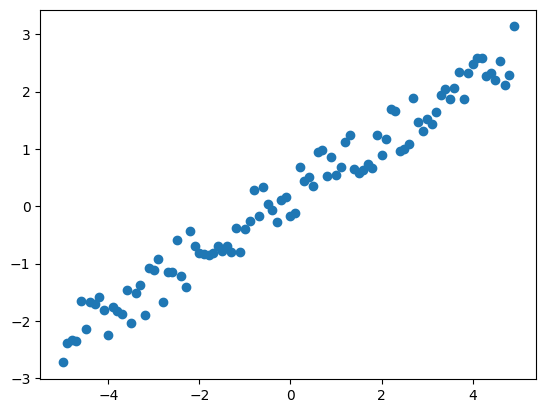

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suppress runtime warnings due to overflow
np.seterr(over='ignore')

# Your provided linear_regression class
class linear_regression:
    def __init__(self):  # initial parameters
        self.w = 0.5  # fixed initialization for comparison convenience
        self.b = 0.5

    def fit(self, X, Y, lr=0.00001):
        self.lr = lr
        epoch = 0
        loss_log = []
        while epoch < 8000:
            pred = self.predict(X)
            l = self.loss(pred, Y)  # get loss
            loss_log.append(l)
            delta_w = 2 * np.matmul((Y - pred).T, X).flatten()  # gradient of w
            delta_b = sum(2 * (Y - pred)).flatten()
            self.w = self.w + lr * delta_w
            self.b = self.b + lr * delta_b
            epoch += 1
        return np.mean(loss_log[-5:])

    def loss(self, pred, Y):
        error = Y - pred
        return np.mean(error ** 2)  # MSE

    def predict(self, X):
        return X * self.w + self.b  # n by 1

# Initializing data
X_original = np.arange(-5, 5, 0.1)
w = 0.5
b = 0.2
Y = X_original * w + b + (np.random.rand(X_original.shape[0], ) - 0.5)  # add some noise to Y
X_original = X_original.reshape(100, 1)
Y = Y.reshape(100, 1)

plt.scatter(X_original, Y)
plt.show()


In [ ]:

# Learning rates and scales
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
scales = [0.1, 1, 2, 5, 10]

# Dictionary to store results
results = {}

# Running the regression for each combination of learning rate and scale
for lr in learning_rates:
    for scale in scales:
        X_scaled = X_original * scale
        model = linear_regression()
        try:
            loss = model.fit(X_scaled, Y, lr=lr)
        except Exception as e:  # In case of any numerical issue
            loss = float('inf')
        results[(lr, scale)] = loss

# Converting the results to a DataFrame
df_results = pd.DataFrame(list(results.items()), columns=['LR_Scale', 'Loss'])
df_results['Learning Rate'] = df_results['LR_Scale'].apply(lambda x: x[0])
df_results['Scale'] = df_results['LR_Scale'].apply(lambda x: x[1])
df_results.drop('LR_Scale', axis=1, inplace=True)
df_results = df_results.pivot(index='Scale', columns='Learning Rate', values='Loss')

# Beautify the DataFrame using Styler
def color_negative_red(val):
    color = 'red' if val == float('inf') else 'black'
    return f'color: {color}'

styled_df = df_results.style.applymap(color_negative_red)
styled_df


<ipython-input-2-8de762a6f008>:22: RuntimeWarning: invalid value encountered in matmul
  delta_w = 2 * np.matmul((Y - pred).T, X).flatten()  # gradient of w
<ipython-input-2-8de762a6f008>:25: RuntimeWarning: invalid value encountered in add
  self.b = self.b + lr * delta_b
<ipython-input-2-8de762a6f008>:34: RuntimeWarning: invalid value encountered in add
  return X * self.w + self.b  # n by 1
<ipython-input-2-8de762a6f008>:23: RuntimeWarning: invalid value encountered in add
  delta_b = sum(2 * (Y - pred)).flatten()
<ipython-input-2-8de762a6f008>:24: RuntimeWarning: invalid value encountered in add
  self.w = self.w + lr * delta_w
<ipython-input-3-da3d21a6665c>:31: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df_results.style.applymap(color_negative_red)


Learning Rate,0.000010,0.000100,0.001000,0.010000,0.100000
Scale,,,,,
0.100000,0.194887,0.077292,0.077292,0.380144,nan
1.000000,0.077292,0.077292,0.077292,nan,nan
2.000000,0.077292,0.077292,nan,nan,nan
5.000000,0.077292,nan,nan,nan,nan
10.000000,0.077292,nan,nan,nan,nan


## loss w.r.t. learning rate & data scale




In [ ]:
import numpy as np
import pandas as pd

np.random.seed(20)

class linear_regression:
    def fit(self, X, Y, lr=1e-4, max_epochs=80000):
        epoch = 0
        while (epoch < max_epochs):
            pred = self.predict(X)
            l = self.loss(pred, Y)
            if l < 0.0792:
                break
            delta_w = 2 * np.matmul((Y - pred).T, X)
            delta_b = sum(2 * (Y - pred))
            self.w = self.w + lr * delta_w.T
            self.b = self.b + lr * delta_b
            epoch = epoch + 1
        return epoch, l

    def loss(self, pred, Y):
        error = Y - pred
        return sum(error**2) / error.shape[0]

    def predict(self, X):
        return np.matmul(X, self.w) + self.b

    def __init__(self):
        self.w = np.array([[0.5], [0.5]])
        self.b = 0.3

# Generate data
X1 = np.arange(-5, 5, 0.1)
X2 = np.arange(-5, 5, 0.1)
W = np.array([[0.1], [0.2]])
b = 0.1
Y = np.matmul(np.column_stack((X1, X2)), W) + b + (np.random.rand(X1.shape[0], 1) - 0.5)

# Learning rates and scales
learning_rates = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
scales = [1, 5, 15, 50]

results = {}
for lr in learning_rates:
    for scale in scales:
        X_scaled = np.column_stack((X1, X2 * scale))
        model = linear_regression()
        epochs, final_loss = model.fit(X_scaled, Y, lr=lr)
        results[(lr, scale)] = (epochs, final_loss)

# Create and display a table for each learning rate
for lr in learning_rates:
    data = []
    for scale in scales:
        epochs, final_loss = results[(lr, scale)]
        data.append({'Scale': scale, 'Epochs': epochs, 'Final Loss': final_loss})

    df = pd.DataFrame(data)
    print(f"\nLearning Rate: {lr}")
    print(df.to_string(index=False))
    print("\n" + "="*40)

# Create an overall summary DataFrame
df_summary = pd.DataFrame(index=scales, columns=pd.MultiIndex.from_product([learning_rates, ['Epochs', 'Loss']]))
for lr in learning_rates:
    for scale in scales:
        epochs, final_loss = results[(lr, scale)]
        df_summary.at[scale, (lr, 'Epochs')] = epochs
        df_summary.at[scale, (lr, 'Loss')] = final_loss

print("\nOverall Summary:")
print(df_summary)

<ipython-input-8-27f1eb2b4021>:26: RuntimeWarning: invalid value encountered in add
  return np.matmul(X, self.w) + self.b
<ipython-input-8-27f1eb2b4021>:15: RuntimeWarning: invalid value encountered in add
  delta_b = sum(2 * (Y - pred))
<ipython-input-8-27f1eb2b4021>:16: RuntimeWarning: invalid value encountered in add
  self.w = self.w + lr * delta_w.T



Learning Rate: 0.01
 Scale  Epochs Final Loss
     1   80000      [nan]
     5   80000      [nan]
    15   80000      [nan]
    50   80000      [nan]


Learning Rate: 0.001
 Scale  Epochs Final Loss
     1   80000      [nan]
     5   80000      [nan]
    15   80000      [nan]
    50   80000      [nan]


Learning Rate: 0.0001
 Scale  Epochs            Final Loss
     1      31 [0.07909091615161844]
     5   80000                 [nan]
    15   80000                 [nan]
    50   80000                 [nan]


Learning Rate: 1e-05
 Scale  Epochs            Final Loss
     1     311 [0.07916289542072194]
     5     306  [0.0791864936211291]
    15   80000                 [nan]
    50   80000                 [nan]


Learning Rate: 1e-06
 Scale  Epochs            Final Loss
     1    3104 [0.07919771440959053]
     5    3060 [0.07919741226768029]
    15    3048 [0.07919929521819313]
    50   80000                 [nan]


Overall Summary:
   0.010000      0.001000      0.000100             

# 4. Utilize recall/precision to improve

low recall -> too picky -> lower the bar

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(1000, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Create an imbalanced dataset
X = np.vstack([X[y == 0], X[y == 1][:100]])
y = np.hstack([y[y == 0], y[y == 1][:100]])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initial model with low recall
def train_and_evaluate(X_train, y_train, X_test, y_test, model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))  # Corrected this line

# Initial model with default threshold (0.5)
initial_model = LogisticRegression(random_state=42)
train_and_evaluate(X_train, y_train, X_test, y_test, initial_model, "Initial Model")



# Improve recall by adjusting the decision threshold
def predict_with_threshold(model, X, threshold):
    y_pred_proba = model.predict_proba(X)[:, 1]
    return (y_pred_proba >= threshold).astype(int)

# Lower the threshold to (0.3)
threshold_model = LogisticRegression(random_state=42)
threshold_model.fit(X_train, y_train)
y_pred_threshold = predict_with_threshold(threshold_model, X_test, 0.3)
print("\nModel with Adjusted Threshold - Classification Report:")
print(classification_report(y_test, y_pred_threshold))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_threshold))

# Improve both recall and precision using feature scaling and SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

final_model = LogisticRegression(random_state=42)
train_and_evaluate(X_train_resampled, y_train_resampled, X_test_scaled, y_test, final_model, "Final Model (with Scaling and SMOTE)")


Initial Model - Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       1.00      0.78      0.88        23

    accuracy                           0.96       118
   macro avg       0.97      0.89      0.93       118
weighted avg       0.96      0.96      0.96       118

Confusion Matrix:
[[95  0]
 [ 5 18]]

Model with Adjusted Threshold - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       1.00      0.87      0.93        23

    accuracy                           0.97       118
   macro avg       0.98      0.93      0.96       118
weighted avg       0.98      0.97      0.97       118

Confusion Matrix:
[[95  0]
 [ 3 20]]

Final Model (with Scaling and SMOTE) - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        95
    

# 5. Evaluation

## accuracy

In [ ]:
# Example of calculating classification accuracy

# Calculate accuracy percentage between two lists
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Test accuracy
actual = [0,0,0,0,0,1,1,1,1,1]
predicted = [0,1,0,0,0,1,0,1,1,1]
accuracy = accuracy_metric(actual, predicted)
print(accuracy)

80.0


## confusion matrix

In [ ]:
# Example of calculating classification metrics

# Calculate accuracy percentage between two lists
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Calculate precision
def precision_metric(actual, predicted):
    TP = sum((a == 1) & (p == 1) for a, p in zip(actual, predicted))
    FP = sum((a == 0) & (p == 1) for a, p in zip(actual, predicted))
    return TP / (TP + FP)

# Calculate recall
def recall_metric(actual, predicted):
    TP = sum((a == 1) & (p == 1) for a, p in zip(actual, predicted))
    FN = sum((a == 1) & (p == 0) for a, p in zip(actual, predicted))
    return TP / (TP + FN)

# Calculate F1 score
def f1_metric(actual, predicted):
    precision = precision_metric(actual, predicted)
    recall = recall_metric(actual, predicted)
    return 2 * (precision * recall) / (precision + recall)

# Calculate confusion matrix
def confusion_matrix_metric(actual, predicted):
    TP = sum((a == 1) & (p == 1) for a, p in zip(actual, predicted))
    TN = sum((a == 0) & (p == 0) for a, p in zip(actual, predicted))
    FP = sum((a == 0) & (p == 1) for a, p in zip(actual, predicted))
    FN = sum((a == 1) & (p == 0) for a, p in zip(actual, predicted))
    return [[TN, FP], [FN, TP]]

def print_confusion_matrix(conf_matrix):
    print("\nConfusion Matrix:")
    print("\t     Predicted:")
    print("\t      0     1")
    print("Actual: 0 {0:5d} {1:5d}".format(conf_matrix[0][0], conf_matrix[0][1]))
    print("        1 {0:5d} {1:5d}".format(conf_matrix[1][0], conf_matrix[1][1]))


# Test values
actual = [0,0,0,0,0,1,1,1,1,1]
predicted = [0,1,0,0,0,1,0,1,1,1]

# Calculate metrics
accuracy = accuracy_metric(actual, predicted)
precision = precision_metric(actual, predicted)
recall = recall_metric(actual, predicted)
f1 = f1_metric(actual, predicted)
conf_matrix = confusion_matrix_metric(actual, predicted)

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print_confusion_matrix(conf_matrix)

Accuracy: 80.0
Precision: 0.8
Recall: 0.8
F1 Score: 0.8000000000000002

Confusion Matrix:
	     Predicted:
	      0     1
Actual: 0     4     1
        1     1     4


## three class with `sklearn`


Sure, I can provide you with a Python demo for a three-class classification problem, along with the evaluation using a confusion matrix. In this example, I'll use a simple dataset from `scikit-learn`, perform classification using a basic classifier, and then evaluate the model using a confusion matrix. Let's proceed step by step.

1. **Importing Required Libraries**: We'll need `numpy`, `matplotlib` for plotting, `scikit-learn` for the dataset and the classifier, and `confusion_matrix` for evaluation.

2. **Loading the Dataset**: We'll use a dataset like the Iris dataset, which is a classic in machine learning and includes three classes.

3. **Preprocessing the Data**: Splitting the dataset into a training set and a test set.

4. **Training a Classifier**: We'll use a simple classifier like Logistic Regression for this demo.

5. **Making Predictions and Evaluating the Model**: Using the test set to make predictions and then creating a confusion matrix to evaluate the model.

Let's implement this in Python code. I will write the code and explain each step.

The Python script successfully executed a three-class classification task using the Iris dataset, and then evaluated the model using a confusion matrix. Here's a breakdown of the steps:

1. **Import Libraries**: We imported necessary libraries such as `numpy`, `matplotlib`, and relevant components from `scikit-learn`.

2. **Dataset**: We used the Iris dataset, which contains 3 classes of iris species.

3. **Data Splitting**: The dataset was split into training (80%) and testing (20%) sets.

4. **Model Training**: We trained a Logistic Regression model on the training data.

5. **Model Prediction and Evaluation**: The model made predictions on the test set, and we evaluated these predictions using a confusion matrix.

The confusion matrix displayed is a graphical representation of the model's performance. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class. This matrix helps in understanding not only the errors being made by the classifier but also the types of errors that are occurring.

In [ ]:
# prompt: show iris information

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()

# Show information about the dataset
print("Number of instances:", iris.target.shape[0])
print("Number of attributes:", iris.data.shape[1])
print("Target names:", iris.target_names)
print("Feature names:", iris.feature_names)

X = iris.data
y = iris.target

Number of instances: 150
Number of attributes: 4
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


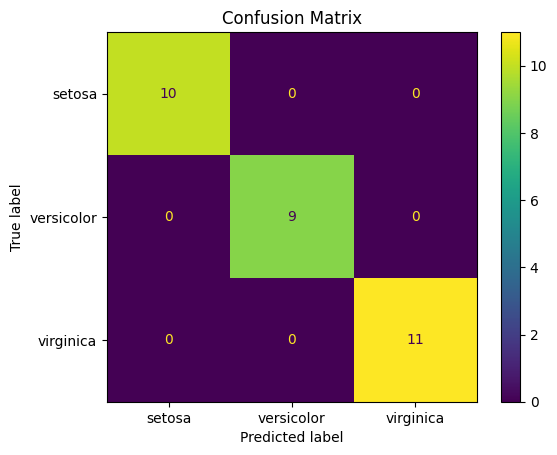

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Logistic Regression model on the Training set
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# 6. Data split

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Logistic Regression Classifier
classifier = LogisticRegression(max_iter=200)

# K-Fold Cross-Validation (5 round classification inside)
for i in range(10):
    kf = KFold(n_splits=5, shuffle=True, random_state=i)
    accuracy_kfold = np.mean(cross_val_score(classifier, X, y, cv=kf))
    print(accuracy_kfold)

0.9533333333333334
0.96
0.96
0.96
0.9666666666666668
0.9733333333333334
0.96
0.9666666666666668
0.9666666666666666
0.9733333333333334


### K-round random v.s. k-fold

Look into K-round ramdom

In [ ]:
# Perform 5 rounds of random split and evaluate the accuracy

accuracy_scores = []

for i in range(10):
    # Random Split for each round
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Training the model
    classifier.fit(X_train, y_train)

    # Making predictions and evaluating accuracy
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Storing the accuracy for each round
    accuracy_scores.append(accuracy)
    print(accuracy)


1.0
0.9666666666666667
0.9666666666666667
1.0
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.8666666666666667
0.9
1.0
